In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error


Скоро весна и лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов или самокатов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

<img src="https://thetahat.ru/files/ad/main/3/bike1.jpeg">

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [126]:
data = pd.read_csv('day.csv')

features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 
            'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
data = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {train_data.shape[0]} записей")
print(f"Тестовая выборка: {test_data.shape[0]} записей")

Обучающая выборка: 584 записей
Тестовая выборка: 147 записей


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 7e2346d718d374e3f957928b573e2a30 -->
#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

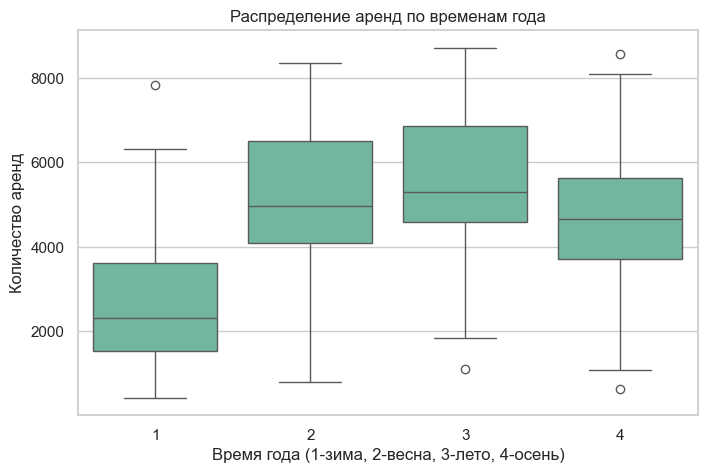

In [127]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=train_data)
plt.title("Распределение аренд по временам года")
plt.xlabel("Время года (1-зима, 2-весна, 3-лето, 4-осень)")
plt.ylabel("Количество аренд")
plt.show()

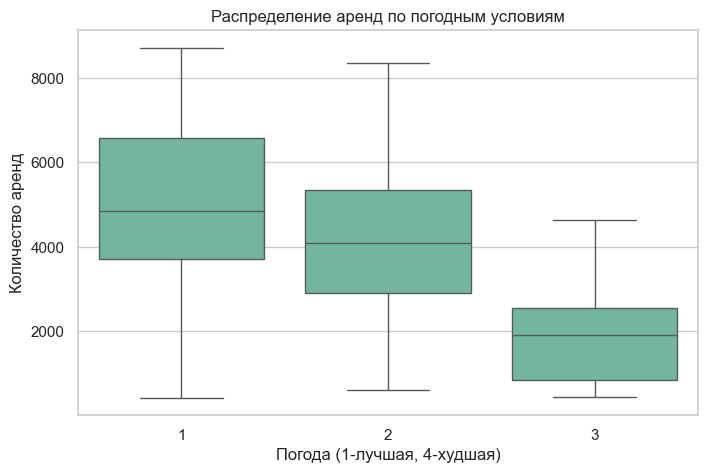

In [128]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='weathersit', y='cnt', data=train_data)
plt.title("Распределение аренд по погодным условиям")
plt.xlabel("Погода (1-лучшая, 4-худшая)")
plt.ylabel("Количество аренд")
plt.show()

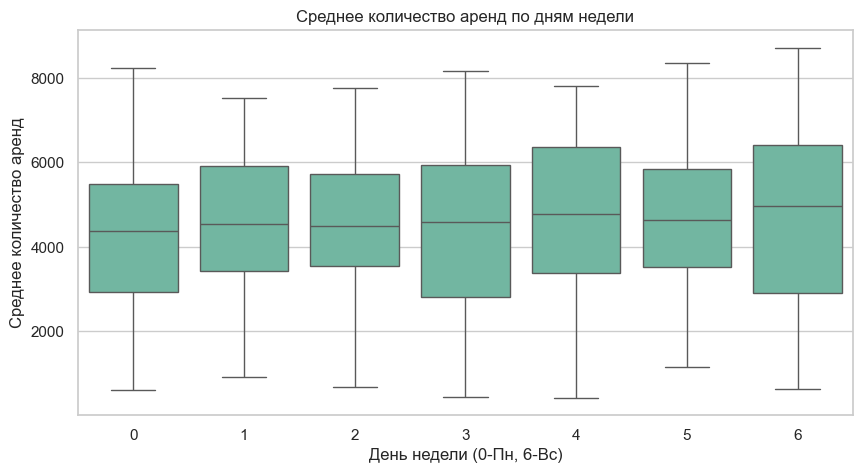

In [129]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday', y='cnt', data=train_data)
plt.title("Среднее количество аренд по дням недели")
plt.xlabel("День недели (0-Пн, 6-Вс)")
plt.ylabel("Среднее количество аренд")
plt.show()

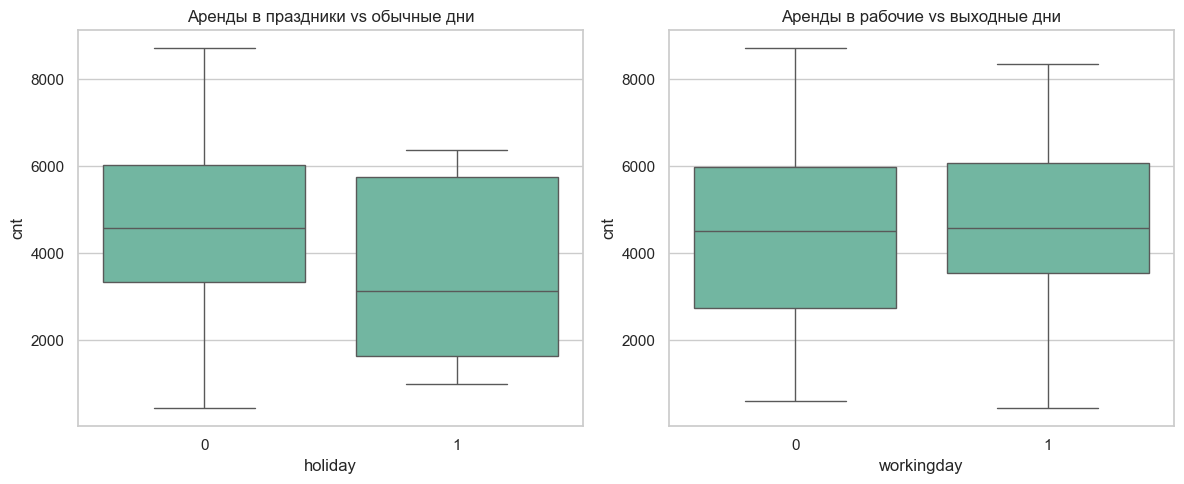

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='holiday', y='cnt', data=train_data, ax=axes[0])
sns.boxplot(x='workingday', y='cnt', data=train_data, ax=axes[1])
axes[0].set_title("Аренды в праздники vs обычные дни")
axes[1].set_title("Аренды в рабочие vs выходные дни")
plt.tight_layout()
plt.show()

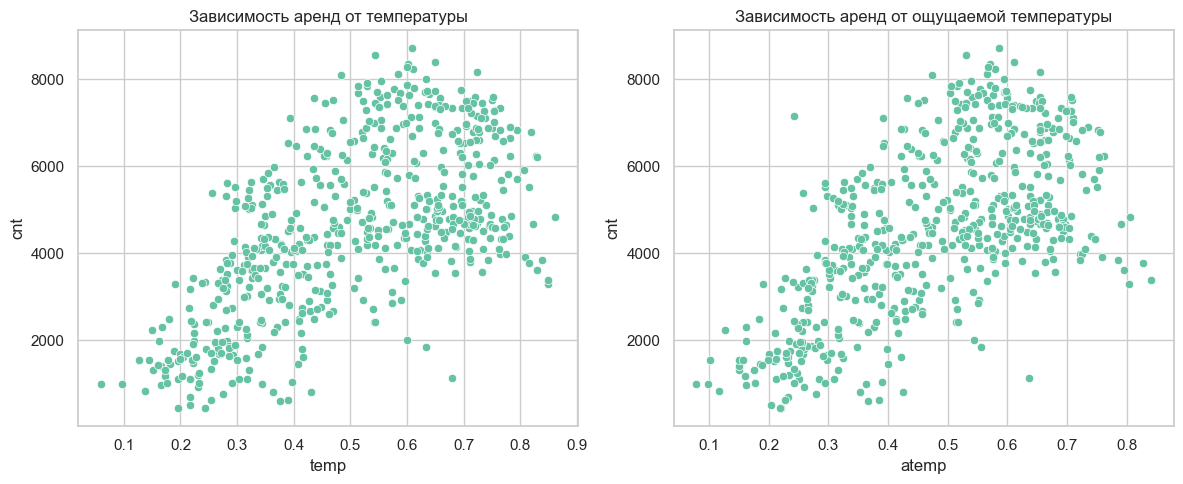

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='temp', y='cnt', data=train_data, ax=axes[0])
sns.scatterplot(x='atemp', y='cnt', data=train_data, ax=axes[1])
axes[0].set_title("Зависимость аренд от температуры")
axes[1].set_title("Зависимость аренд от ощущаемой температуры")
plt.tight_layout()
plt.show()

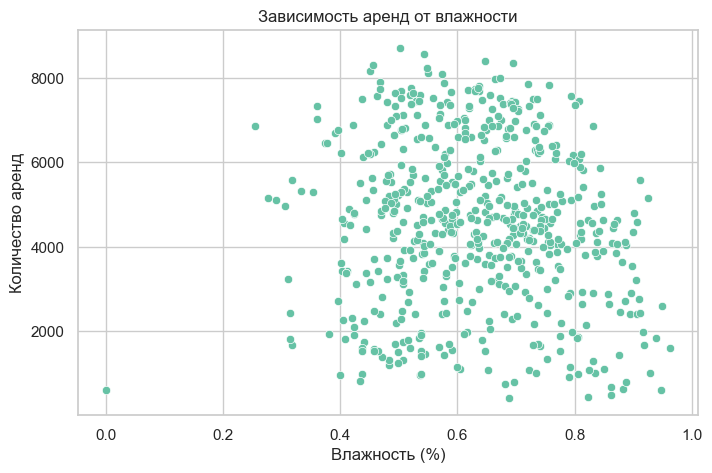

In [132]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='hum', y='cnt', data=train_data)
plt.title("Зависимость аренд от влажности")
plt.xlabel("Влажность (%)")
plt.ylabel("Количество аренд")
plt.show()

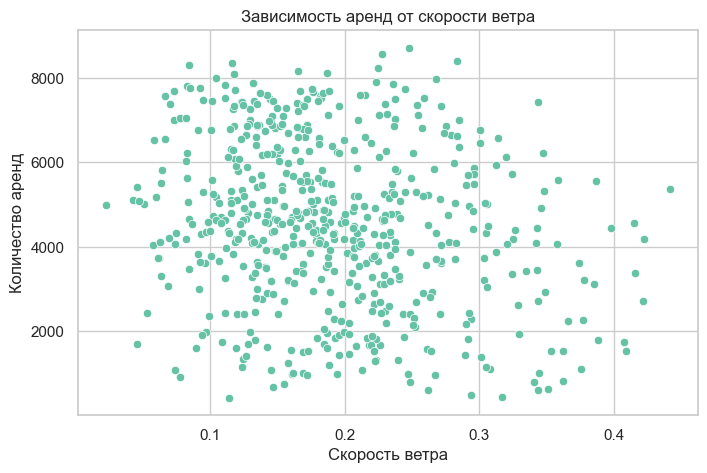

In [133]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='windspeed', y='cnt', data=train_data)
plt.title("Зависимость аренд от скорости ветра")
plt.xlabel("Скорость ветра")
plt.ylabel("Количество аренд")
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 4c1edb365b02e434e38deeb52b2096fa -->
Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$.



**Выводы по графикам:** <br>

В данных есть явные выбросы. Особенно заметно на графиках температуры и скорости ветра <br>
Стоит рассматривать нелинейные функции из-за криволинейности некоторых графиков

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- e5fcb54a72af33e2c09b66124e63e5fc -->
#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, создание каких-либо новых признаков (посмотрите пример из лекции). То, как именно выполнять подготовку данных, является целым исскуством. Здесь нет "правильного" подхода, здесь есть метрика качества на тестовом множестве, которая в последствии оценит качество вашей модели.

*Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество вашей модели на следующих шагах.*

**Процедура предобработки данных:**

**a).** Обрабобтка выбросов и пропусков

**б).** Преобразование категориальных признаков

**в).** Масштабирование вещественных признаков

**г).** Создание новых признаков

**д).** Финальный выбор признаков и разбиение

Реализуйте данную процедуру.

In [134]:
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [135]:
df_encoded = pd.get_dummies(df, columns=['mnth', 'weekday'], drop_first=True)

In [136]:
num_features = ['temp', 'atemp', 'hum', 'windspeed']
scaler = StandardScaler()
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

In [137]:
df_encoded['cnt_log'] = np.log1p(df_encoded['cnt'])

In [138]:
df_encoded['day_type'] = df['workingday'] * 2 + df['holiday']
df_encoded['season_temp'] = df['season'] * df['temp']
df_encoded['temp_diff'] = df['temp'] - df['atemp']

In [139]:
features = [col for col in df_encoded.columns if col not in ['cnt', 'cnt_log', 'instant', 'dteday', 'casual', 'registered']]
X = df_encoded[features]
y = df_encoded['cnt_log'] 

In [145]:
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (584, 29)
Размер тестовой выборки: (147, 29)


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- c5124704b109dacbd9cf5647f50eb72c -->
#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [151]:
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.Series(model.coef_, index=X_train.columns)
intercept = model.intercept_

print("Свободный коэффициент:", intercept)
print("\nКоэффициенты при признаках:")
print(coefficients.sort_values(ascending=False))

Свободный коэффициент: 7.94530450700657

Коэффициенты при признаках:
yr             0.466344
temp           0.424099
season         0.416052
mnth_3         0.115655
atemp          0.110640
mnth_2         0.100526
mnth_5         0.092445
workingday     0.078138
mnth_4         0.077695
weekday_6      0.074462
temp_diff      0.059561
weekday_5      0.039585
day_type       0.023692
mnth_9         0.010639
weekday_1      0.003261
weekday_2     -0.027834
weekday_3     -0.033120
weekday_4     -0.036338
hum           -0.056996
windspeed     -0.058977
mnth_10       -0.066813
mnth_6        -0.071550
holiday       -0.132583
mnth_12       -0.157373
mnth_8        -0.169265
mnth_11       -0.186360
weathersit    -0.191228
mnth_7        -0.279040
season_temp   -0.537318
dtype: float64


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 0e8e860f57fc7df75f236442f7206c78 -->
Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. 

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. Особенно стоит обратить на это внимание в случае высоких значений метрик.

In [152]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

threshold = np.percentile(y_true, 99)
mask = y_true < threshold

if np.sum(mask) < 10:
    print("Слишком мало объектов после фильтрации выбросов. Метрики считаются без фильтрации.")
    y_eval = y_true
    y_pred_eval = y_pred
else:
    y_eval = y_true[mask]
    y_pred_eval = y_pred[mask]

rmse = root_mean_squared_error(y_eval, y_pred_eval)
mae = mean_absolute_error(y_eval, y_pred_eval)
mape = np.mean(np.abs((y_eval - y_pred_eval) / y_eval)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 965.35
MAE: 634.94
MAPE: 134.87%


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 52266029600cdfda3b1cfce9e68f5c99 -->
Сделайте выводы.

**Выводы:**

1. Температура и время года — ключевые факторы. Модель это хорошо уловила. <br>
2. Плохая погода сильно снижает спрос.
3. Композитный признак season_temp скорее вредит — его стоит исключить.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->
*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

<img src="https://thetahat.ru/files/ad/main/3/bike2.png">